In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [99]:
raw_train_data = pd.read_csv("../input/titanic/train.csv")
raw_train_data
raw_test_data = pd.read_csv('../input/titanic/test.csv')

In [100]:
print(raw_test_data.isnull().sum().sum())

414


In [101]:
raw_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [102]:
raw_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
raw_train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

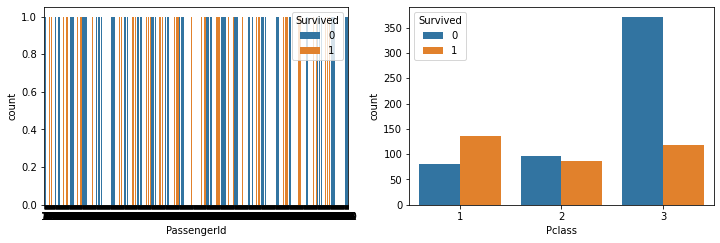

In [104]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['PassengerId'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['Pclass'], hue=raw_train_data['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

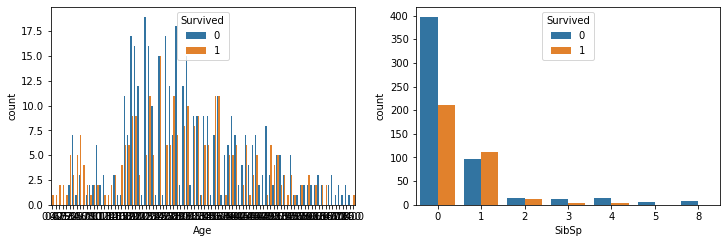

In [105]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['Age'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['SibSp'], hue=raw_train_data['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

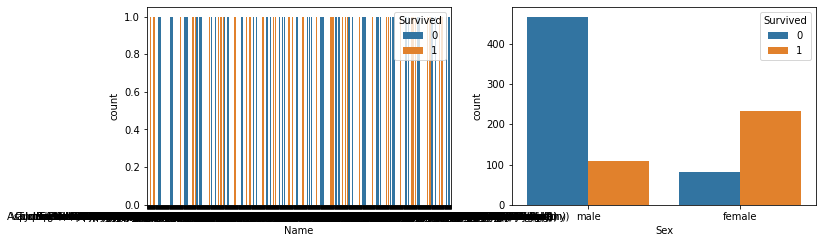

In [106]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['Name'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['Sex'], hue=raw_train_data['Survived'])

<AxesSubplot:xlabel='Ticket', ylabel='count'>

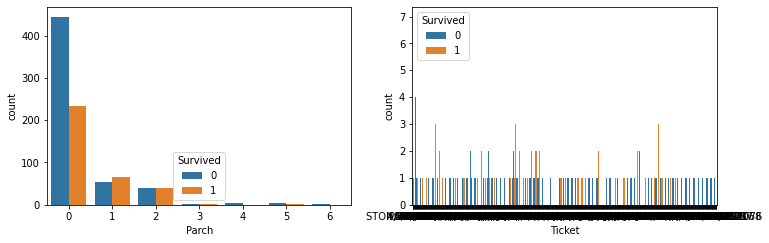

In [107]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['Parch'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['Ticket'], hue=raw_train_data['Survived'])

<AxesSubplot:xlabel='Cabin', ylabel='count'>

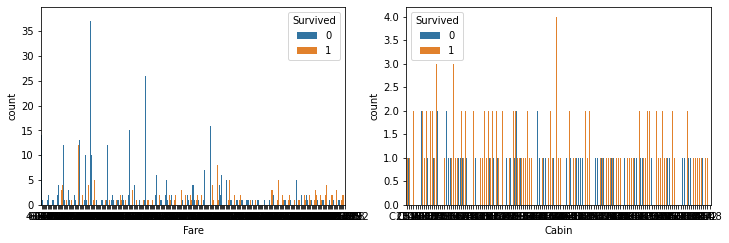

In [108]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['Fare'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['Cabin'], hue=raw_train_data['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

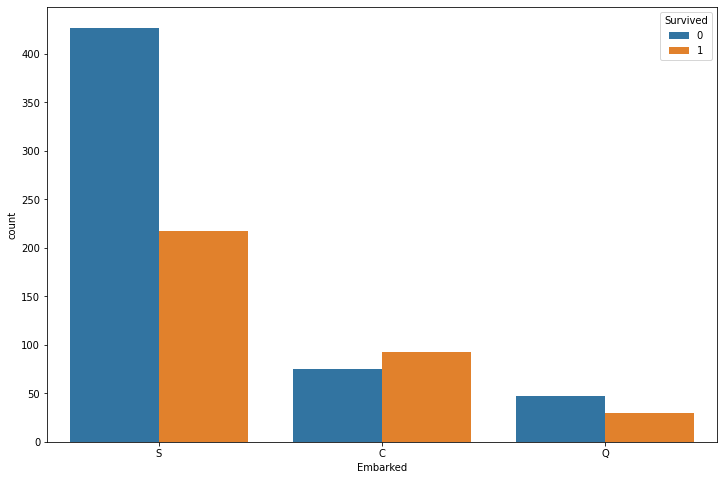

In [109]:
plt.figure(figsize=(12,8))
sns.countplot(x=raw_train_data['Embarked'], hue=raw_train_data['Survived'])

In [110]:
train_data_before_processing = raw_train_data.drop('Cabin',axis=1)
train_data_before_processing = train_data_before_processing.drop('Name',axis=1)
train_data_before_processing = train_data_before_processing.drop('Ticket',axis=1)
train_data_before_processing = train_data_before_processing.drop('PassengerId',axis=1)

test_data_before_processing = raw_test_data.drop('Cabin',axis=1)
test_data_before_processing = test_data_before_processing.drop('Name',axis=1)
test_data_before_processing = test_data_before_processing.drop('Ticket',axis=1)
test_data_before_processing = test_data_before_processing.drop('PassengerId',axis=1)

train_data_before_processing 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<AxesSubplot:xlabel='Age', ylabel='count'>

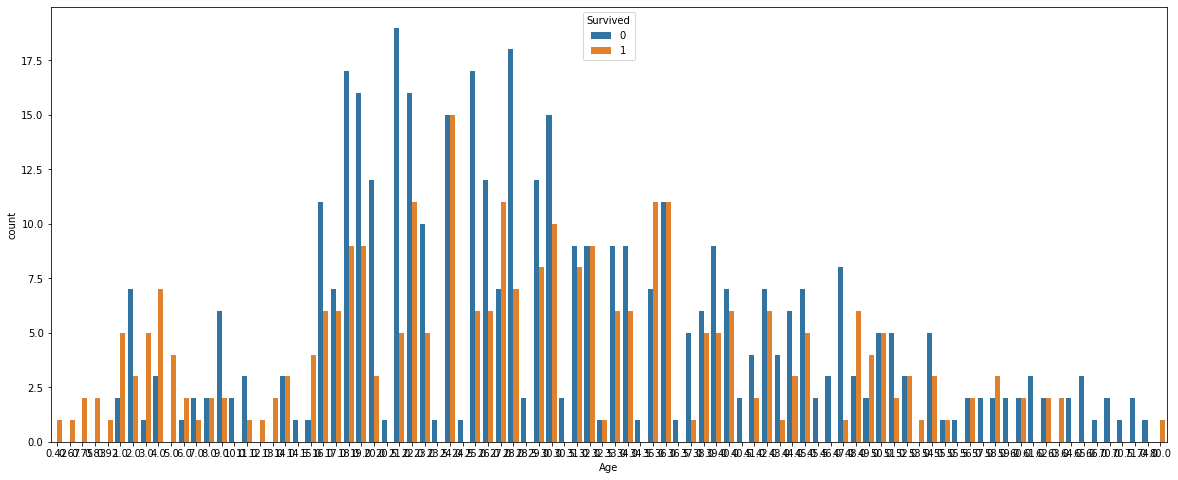

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data = raw_train_data , hue='Survived')

In [112]:
train_data_before_processing['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [113]:
train_data_before_processing1 = train_data_before_processing.sort_values('Survived',ascending=False)
train_data_before_processing1.drop(train_data_before_processing1.tail(207).index,
        inplace = True)
train_data_before_processing1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,1,male,4.0,0,2,81.8583,S
319,1,1,female,40.0,1,1,134.5000,C
334,1,1,female,NaN,1,0,133.6500,S
330,1,3,female,NaN,2,0,23.2500,Q
329,1,1,female,16.0,0,1,57.9792,C
...,...,...,...,...,...,...,...,...
70,0,2,male,32.0,0,0,10.5000,S
72,0,2,male,21.0,0,0,73.5000,S
129,0,3,male,45.0,0,0,6.9750,S
103,0,3,male,33.0,0,0,8.6542,S


In [114]:
train_data_before_processing1 = train_data_before_processing1.sample(frac=1).reset_index(drop=True)
train_data_before_processing1

test_data_before_processing1 = test_data_before_processing

In [115]:
train_data_before_processing1['Sex'] = train_data_before_processing1['Sex'].map({'male':0,'female':1})
train_data_before_processing1

test_data_before_processing1['Sex'] = test_data_before_processing1['Sex'].map({'male':0,'female':1})

In [116]:
train_data_before_processing1['Age'].describe()

count    557.000000
mean      29.309102
std       14.516729
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [117]:
train_data_before_processing1['Age'] = train_data_before_processing1['Age'].fillna(value = train_data_before_processing1['Age'].mean())

test_data_before_processing1['Age'] = test_data_before_processing1['Age'].fillna(value = 29)

In [118]:
print(test_data_before_processing1.isnull().sum().sum())

1


In [119]:
test_data_before_processing1['Fare'].describe()
test_data_before_processing1['Fare']=test_data_before_processing1['Fare'].fillna(value=0.069540)

In [120]:
train_dummy_Embarked = pd.get_dummies(train_data_before_processing1['Embarked'])
train_dummy_Embarked

test_dummy_Embarked = pd.get_dummies(test_data_before_processing1['Embarked'])
test_dummy_Embarked

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [121]:
train_data_before_processing1 = pd.concat([train_data_before_processing1,train_dummy_Embarked], axis=1)
train_data_before_processing1

test_data_before_processing1 = pd.concat([test_data_before_processing1,test_dummy_Embarked], axis=1)
test_data_before_processing1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,3,0,34.5,0,0,7.8292,Q,0,1,0
1,3,1,47.0,1,0,7.0000,S,0,0,1
2,2,0,62.0,0,0,9.6875,Q,0,1,0
3,3,0,27.0,0,0,8.6625,S,0,0,1
4,3,1,22.0,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,29.0,0,0,8.0500,S,0,0,1
414,1,1,39.0,0,0,108.9000,C,1,0,0
415,3,0,38.5,0,0,7.2500,S,0,0,1
416,3,0,29.0,0,0,8.0500,S,0,0,1


In [122]:
train_data_before_processing1 = train_data_before_processing1.drop('Embarked',axis=1)
train_data_before_processing1

test_data_before_processing1 = test_data_before_processing1.drop('Embarked',axis=1)
test_data_before_processing1

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,29.0,0,0,8.0500,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,0
415,3,0,38.5,0,0,7.2500,0,0,1
416,3,0,29.0,0,0,8.0500,0,0,1


In [123]:
print(train_data_before_processing1.isnull().sum().sum())

0


In [124]:
test_data_before_processing1.shape

(418, 9)

In [125]:
q = train_data_before_processing1['SibSp'].quantile(1.0)
train_data_before_processing2 = train_data_before_processing1[train_data_before_processing1['SibSp']<q]

q2 = train_data_before_processing2['Parch'].quantile(1.0)
train_data_before_processing3 = train_data_before_processing2[train_data_before_processing1['Parch']<q2]

q3 = train_data_before_processing3['Fare'].quantile(1.0)
train_data_before_processing4 = train_data_before_processing3[train_data_before_processing1['Fare']<q3]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [126]:
print(train_data_before_processing4.isnull().sum().sum())

0


In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()
scaler.fit(train_data_before_processing4[['Age','Fare']])

MinMaxScaler()

In [129]:
train_scaled_data1 = scaler.transform(train_data_before_processing4[['Age','Fare']])

In [130]:
scaler.fit(test_data_before_processing1[['Age','Fare']])
test_scaled_data1 = scaler.transform(test_data_before_processing1[['Age','Fare']])

In [131]:
train_scaled_data2 = pd.DataFrame.from_records(train_scaled_data1, columns =['Age','Fare'])
train_scaled_data2

test_scaled_data2 = pd.DataFrame.from_records(test_scaled_data1, columns =['Age','Fare'])
test_scaled_data2

,Age,Fare
0,0.452723,0.015282
1,0.617566,0.013663
2,0.815377,0.018909
3,0.353818,0.016908
4,0.287881,0.023984
...,...,...
413,0.380193,0.015713
414,0.512066,0.212559
415,0.505473,0.014151
416,0.380193,0.015713


In [132]:
train_scaled_data2.columns

Index(['Age', 'Fare'], dtype='object')

In [133]:
print(train_scaled_data2.isnull().sum().sum())

0


In [134]:
train_scaled_data = train_data_before_processing4.copy()
train_scaled_data[['Age','Fare']] = train_scaled_data1
print(train_scaled_data.isnull().sum().sum())

test_scaled_data = test_data_before_processing1
test_scaled_data.loc[:, ('Age','Fare')] = test_scaled_data2

0


In [135]:
print(train_scaled_data.isnull().sum().sum())

0


In [136]:
test_scaled_data

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,0.452723,0,0,0.015282,0,1,0
1,3,1,0.617566,1,0,0.013663,0,0,1
2,2,0,0.815377,0,0,0.018909,0,1,0
3,3,0,0.353818,0,0,0.016908,0,0,1
4,3,1,0.287881,1,1,0.023984,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,0.380193,0,0,0.015713,0,0,1
414,1,1,0.512066,0,0,0.212559,1,0,0
415,3,0,0.505473,0,0,0.014151,0,0,1
416,3,0,0.380193,0,0,0.015713,0,0,1


In [137]:
train_scaled_data.corr()['Survived'].sort_values()

Pclass     -0.354868
S          -0.153022
Age        -0.063563
Q           0.003412
SibSp       0.005320
Parch       0.097630
C           0.163854
Fare        0.298571
Sex         0.555624
Survived    1.000000
Name: Survived, dtype: float64

In [138]:
train_scaled_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [139]:
inputs = train_scaled_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']]
targets = train_scaled_data['Survived']
x_test = test_scaled_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']]

In [140]:
test_scaled_data.shape

(418, 9)

In [141]:
from sklearn.model_selection import train_test_split
train_inputs,val_inputs,train_targets,val_targets = train_test_split(inputs,targets,train_size=0.8,random_state=360)

In [142]:
val_inputs.shape

(135, 5)

In [143]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [144]:
model = Sequential()
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [145]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=25)

In [146]:
print(x_test.isnull().sum().sum())

0


In [147]:
print(train_inputs.isnull().sum().sum())

0


In [148]:
model.fit(x=train_inputs,y=train_targets,
          epochs=600,
          validation_data=(val_inputs,val_targets),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/600
17/17 [==============================] - 1s 14ms/step - loss: 0.7729 - val_loss: 0.7392
Epoch 2/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7492 - val_loss: 0.7111
Epoch 3/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7533 - val_loss: 0.6934
Epoch 4/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7041 - val_loss: 0.6789
Epoch 5/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6936 - val_loss: 0.6690
Epoch 6/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7012 - val_loss: 0.6605
Epoch 7/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6552 - val_loss: 0.6503
Epoch 8/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6485 - val_loss: 0.6374
Epoch 9/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6382 - val_loss: 0.6231
Epoch 10/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6396 - val_loss: 0.6111
Epoch 11

<AxesSubplot:>

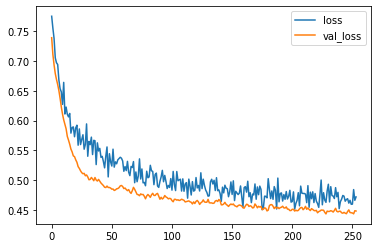

In [149]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [150]:
y_test = pd.read_csv('../input/titanic/gender_submission.csv')
Y_test = y_test.drop('PassengerId',axis=1)
Y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [151]:
x_test.shape

(418, 5)

In [152]:
pred_result = model.predict_classes(x_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [153]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,pred_result))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       266
           1       0.80      0.95      0.87       152

    accuracy                           0.89       418
   macro avg       0.88      0.91      0.89       418
weighted avg       0.91      0.89      0.90       418



In [154]:
print(confusion_matrix(Y_test,pred_result))

[[229  37]
 [  7 145]]


In [155]:
prediction = pd.DataFrame(pred_result,columns=['Survived'])
prediction = pd.concat([y_test['PassengerId'],prediction],axis=1)
prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [156]:
prediction.to_csv('Prediction',index=False)

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0)

In [159]:
model2.fit(train_inputs,train_targets)

RandomForestClassifier(max_depth=1, random_state=0)

In [160]:
print(x_test.isnull().sum().sum())

0


In [161]:
prediction2 = model2.predict(x_test)
prediction2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [162]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [163]:
prediction2 = pd.DataFrame(prediction2,columns=['Survived'])
prediction2 = pd.concat([y_test['PassengerId'],prediction2],axis=1)
prediction2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [164]:
prediction2.to_csv('Prediction3.0',index=False)